# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

# Import Data for Linear and RandomForest Regression

In [2]:
df = pd.read_csv("insurance.csv")
#source: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Explore the data a bit

<Figure size 1000x500 with 0 Axes>

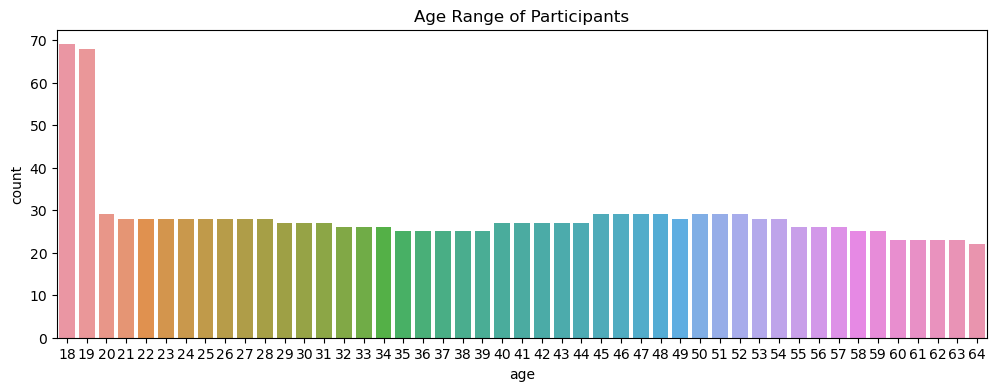

<Figure size 1000x500 with 0 Axes>

In [4]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="age", data=df)

ax.set_title('Age Range of Participants')
plt.figure(figsize=(10,5))

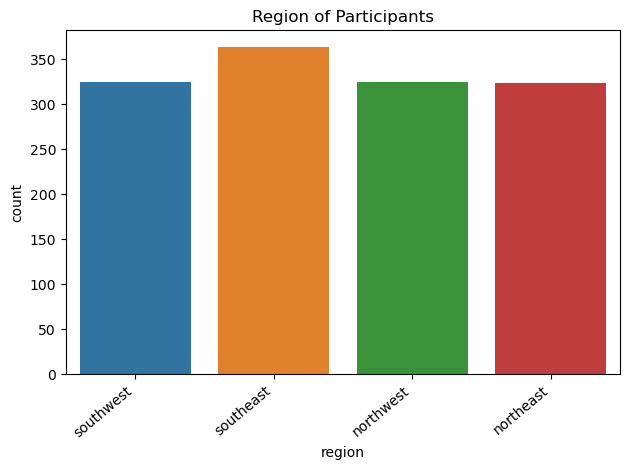

In [5]:
ax = sns.countplot(x="region", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Region of Participants')
plt.tight_layout()
plt.show()

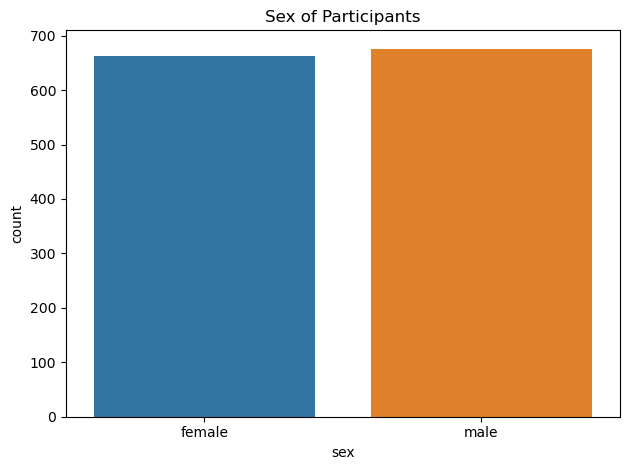

In [6]:
ax = sns.countplot(x="sex", data=df)

ax.set_title('Sex of Participants')
plt.tight_layout()
plt.show()

### Checking to see if any columns have missing data

In [7]:
df.columns[df.isna().any()].tolist()

[]

### Encode Non-numeric Columns

In [8]:
string_var_list = df.columns[df.dtypes==object].tolist()
string_var_list

['sex', 'smoker', 'region']

In [9]:
le = LabelEncoder()
df_encoded = df.copy()

for column in string_var_list:
    df_encoded[column] = le.fit_transform(df_encoded[column])

In [10]:
df_encoded

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Linear Regression and RandomForest for Prediction of Insurance Charges

In [11]:
X = df_encoded[["smoker","bmi", "region", "age", "children"]]
y = df_encoded["charges"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=34)

clf = LinearRegression()
rf = RandomForestRegressor(n_estimators=50)


rf.fit(X_train,y_train)
clf.fit(X_train,y_train)

LinearRegression()

In [12]:
linear_reg_predict = clf.predict(X_test)
randomforest_predict = rf.predict(X_test)

In [13]:
print("Linear Regression Score", clf.score(X_test,y_test))
print("RandomForest Regression Score", rf.score(X_test,y_test))

Linear Regression Score 0.7463785851793763
RandomForest Regression Score 0.8449588066189035


## Cross Validation of Linear and RandomForest Models

### Linear Model

In [14]:
from sklearn.model_selection import cross_val_score

linear_scores = cross_val_score(clf, X_train, y_train, scoring='r2', cv=5)  

# Print the 5-fold cross-validation scores
print(linear_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(linear_scores)))

[0.71996773 0.76644497 0.70468027 0.76461273 0.75747831]
Average 5-Fold CV Score: 0.7426368002178056


### RandomForest Model

In [15]:
random_forest_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)  

# Print the 5-fold cross-validation scores
print(random_forest_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(random_forest_scores)))

[0.81623696 0.85706458 0.80990293 0.84537653 0.84373132]
Average 5-Fold CV Score: 0.8344624638835757


# Import Data for Logistic Regression

In [16]:
df = pd.read_csv("survivors.csv")
#source: https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Explore the data a bit

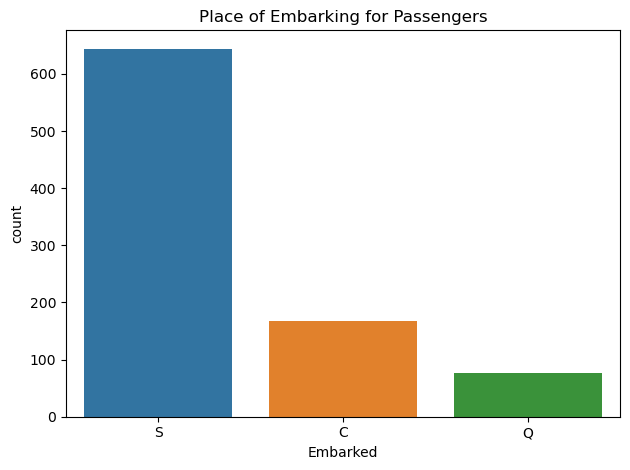

In [18]:
ax = sns.countplot(x="Embarked", data=df)

ax.set_title('Place of Embarking for Passengers')
plt.tight_layout()
plt.show()

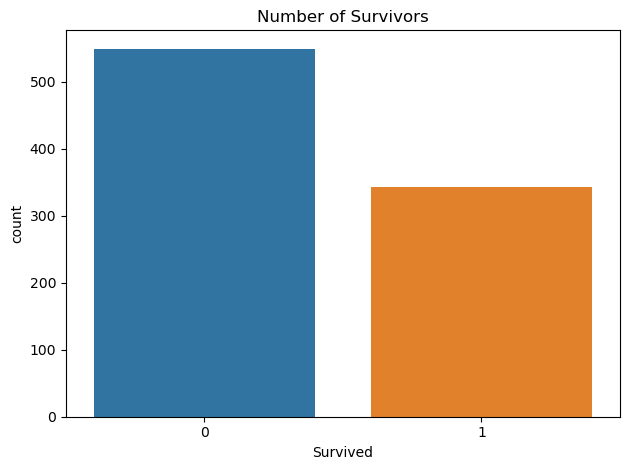

In [19]:
ax = sns.countplot(x="Survived", data=df)

ax.set_title('Number of Survivors')
plt.tight_layout()
plt.show()

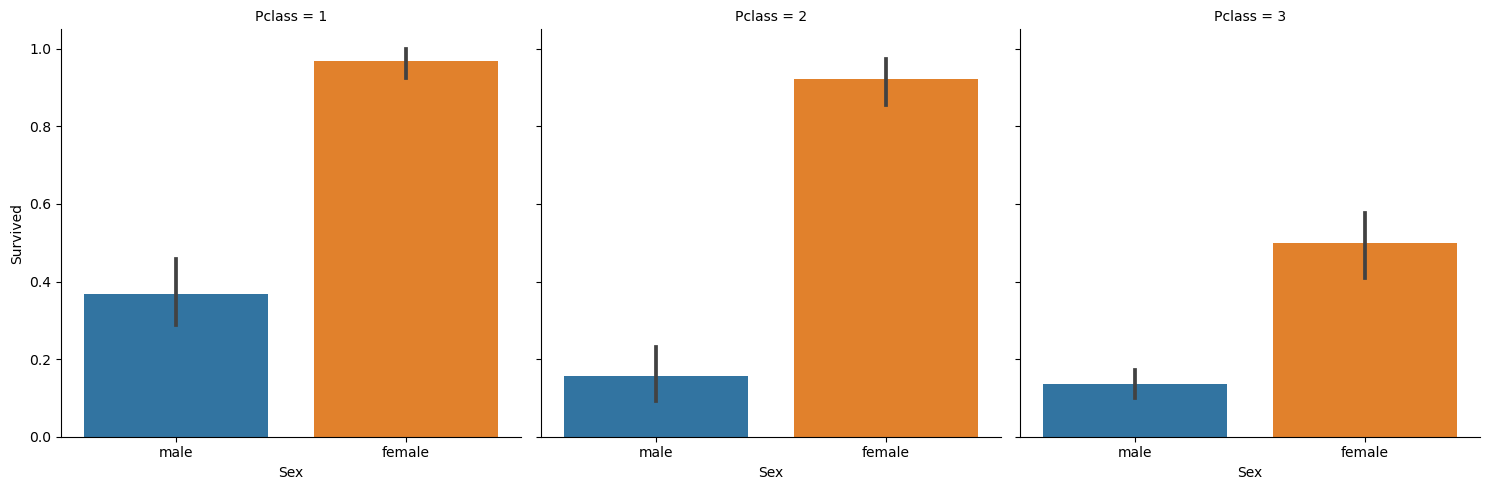

In [20]:
ax = sns.catplot(kind='bar', data=df, x='Sex', y='Survived', col='Pclass')

plt.tight_layout()
plt.show()

### Encode Non-numeric Columns

In [21]:
string_var_list = df.columns[df.dtypes==object].tolist()
string_var_list

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [22]:
le = LabelEncoder()
df_encoded = df.copy()

for column in string_var_list:
    df_encoded[column] = le.fit_transform(df_encoded[column])

### Fill in NaN values, Logistic Regression doesn't take NaN values

In [23]:
#replacing NaN values with 999, as this value is not associated with true values
df_encoded = df_encoded.fillna(999)

In [24]:
#sanity check
df_encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,999.0,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


## Logistic Regression for Prediction for those who survived or did not survive

In [25]:
X = df_encoded[["Pclass", "Sex", "SibSp", "Parch"]]
y = df_encoded["Survived"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=34)

logr = LogisticRegression()

logr.fit(X_train,y_train)

LogisticRegression()

In [26]:
logistic_reg_predict = logr.predict(X_test)
print("Logistic Regression Score", logr.score(X_test,y_test))

Logistic Regression Score 0.8379888268156425


## Cross Validation of Logistic Model

In [27]:
logistic_scores = cross_val_score(logr, X_train, y_train, cv=5)  

# Print the 5-fold cross-validation scores
print(logistic_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(logistic_scores)))

[0.76223776 0.79020979 0.80985915 0.76760563 0.8028169 ]
Average 5-Fold CV Score: 0.7865458485176795


# Import Data for Count Regression

In [28]:
df = pd.read_csv("SeoulBikeData.csv", encoding='unicode_escape')
#source: https://www.kaggle.com/datasets/joebeachcapital/seoul-bike-sharing/data

In [29]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Filtering the data for only Functioning Days of Bike Rentals

In [30]:
df = df[df['Functioning Day'] == "Yes"]

### Breaking up the Hour and Temperature variable into ranges. This helped with the standard errors in the count regression model below.

In [31]:
df['hour_labels']=np.select([df['Hour'].between(0,6),df['Hour'].between(6,12),
                             df['Hour'].between(12,18),df['Hour'].between(18,23)],['Early Morning', 'Morning', 'Afternoon', 'Evening'],'Night')

df['temperature_labels']=np.select([df['Temperature(°C)'].between(-30,10),df['Temperature(°C)'].between(10,20),
                             df['Temperature(°C)'].between(20,30),df['Temperature(°C)'].between(30,37)],['Very Cold', 'Cool', 'Warm', 'Hot'],'Too Hot')

In [32]:
#sanity check to see the new columns
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,hour_labels,temperature_labels
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold


### Convert the string 'Date' column into datetime, then only keep the month element

In [33]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df['Date'] = df['Date'].dt.month

### Misc Data Cleaning

In [34]:
#dropping missing data (there are none in this dataset)
df = df.dropna()

#replacing spaces in column names with underscores
df.columns = df.columns.str.replace(" ", "_", regex=True)

#removing odd characters from column names, renaming the columns
df = df.rename({'Temperature(°C)':'Temperature_C', 'Humidity(%)':'Humidity_percent', 'Dew_point_temperature(°C)':'Dew_point_temperature_C',
                               'Wind_speed_(m/s)':'Wind_speed_m_s', 'Rainfall(mm)':'Rainfall_mm'}, axis=1)
#sanity check
df

,Date,Rented_Bike_Count,Hour,Temperature_C,Humidity_percent,Wind_speed_m_s,Visibility_(10m),Dew_point_temperature_C,Solar_Radiation_(MJ/m2),Rainfall_mm,Snowfall_(cm),Seasons,Holiday,Functioning_Day,hour_labels,temperature_labels
0,12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
1,12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
2,12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
3,12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
4,12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Early Morning,Very Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Evening,Very Cold
8756,11,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Evening,Very Cold
8757,11,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Evening,Very Cold
8758,11,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Evening,Very Cold


## Count Regression

In [35]:
# defining the poisson glm 
poisson_glm = smf.glm(formula = 'Rented_Bike_Count ~ Seasons + hour_labels + temperature_labels + Date + Holiday + Rainfall_mm', 
                      data = df,
                      family = sm.families.Poisson())

# fitting the model 
results = poisson_glm.fit()

# Printing the summary of the regression results
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Rented_Bike_Count   No. Observations:                 8465
Model:                            GLM   Df Residuals:                     8451
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.6035e+05
Date:                Thu, 23 May 2024   Deviance:                   1.4536e+06
Time:                        19:46:09   Pearson chi2:                 1.14e+13
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Check ratio for overdispersed/underdispersed

In [36]:
# Get model deviance residuals
deviance_residuals = results.resid_deviance

# Calculate residual deviance
residual_deviance = sum(deviance_residuals)

# Calculate degrees of freedom
df_cal = results.df_resid

# Calculate the ratio
ratio = residual_deviance / df_cal

# Display the ratio
print("Residual Deviance:", residual_deviance)
print("Degrees of Freedom:", df_cal)
print("Residual Deviance to Degrees of Freedom Ratio:", ratio)

Residual Deviance: -8731.89128077232
Degrees of Freedom: 8451
Residual Deviance to Degrees of Freedom Ratio: -1.0332376382407196


### We can see that Warm conditions have a positive impact on Rented Bikes, while Too Hot and Very Cold have a negative impact on Rented Bikes. Winter as a season and Early Morning as a timeframe also have a negative impact on Rented Bikes.